In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

In [2]:
np.random.seed(19973001)

In [3]:
spread = np.random.rand(50) * 100
center = np.ones(25) * 50
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
data = np.concatenate((spread, center, flier_high, flier_low))

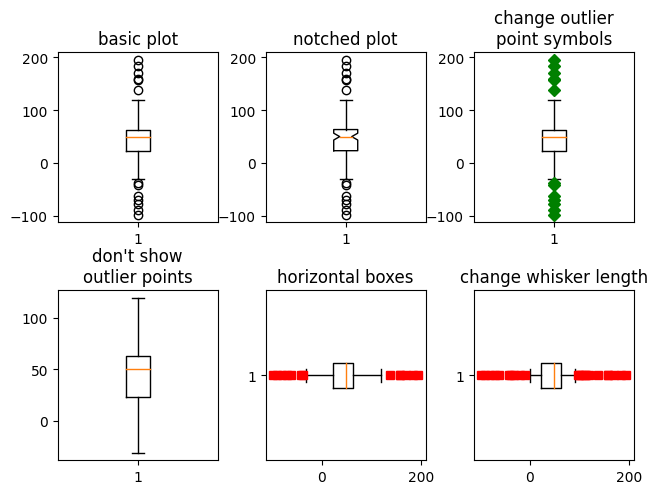

In [4]:
fig, axs = plt.subplots(2, 3)

# basic plot
axs[0, 0].boxplot(data)
axs[0, 0].set_title("basic plot")

# notched plot
axs[0, 1].boxplot(data, 1)
axs[0, 1].set_title("notched plot")

# change outlier point symbols
axs[0, 2].boxplot(data, 0, "gD")
axs[0, 2].set_title("change outlier\npoint symbols")

# don't show outlier points
axs[1, 0].boxplot(data, 0, "")
axs[1, 0].set_title("don't show\noutlier points")

# horizontal boxes
axs[1, 1].boxplot(data, 0, "rs", 0)
axs[1, 1].set_title("horizontal boxes")

# change whisker length
axs[1, 2].boxplot(data, 0, "rs", 0, 0.75)
axs[1, 2].set_title("change whisker length")

fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9, hspace=0.4, wspace=0.3)

plt.show()